## Google data analytics capstone

### The aim of the capstone is to provide answers on following questions:
> 1. What are some trends in smart device usage?
> 2. How could these trends apply to Bellabeat customers?
> 3. How could these trends help influence Bellabeat marketing strategy?

### The purpose of this notebook is to find some insights from datasets.
### Following questions may help find insights:
> 1. What parts of users' day are occupied by bed time, sedentary or active time
> 2. What time the majority of users wakeup/go sleep
> 3. What is the average amount of steps users do per day
> 4. Is there any day per week with maximum/minimum activity 
> 5. Is there any day per week with maximum/minimum time sleep time
> 6. Maximum steps, calories per hour
> 7. Is there any correlation btw calories burnt and sleep time
> 8. What is the main difference btw people who burn relatively larger calories amount in comparison with those who burn less.

In [1]:
# importing libraries
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go

import matplotlib
from matplotlib import pyplot as plt

import phik
from phik.report import plot_correlation_matrix
from phik import report 

!pip install pivottablejs
from pivottablejs import pivot_ui

In [2]:
# importing datasets
Days = pd.read_csv(r'C:\Users\User\Documents\Google data analytics\Capstone Project\Case study 2\DataSET\Fitabase Data 4.12.16-5.12.16\Days.csv')
Minutes = pd.read_csv(r'C:\Users\User\Documents\Google data analytics\Capstone Project\Case study 2\DataSET\Fitabase Data 4.12.16-5.12.16\Minutes.csv')

### 1. What parts of users' day are occupied by bed time, sedentary or active time

In [3]:
Days.head()

,Unnamed: 0,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,...,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day_name,Month_name
0,0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,...,25,13,328,728,1985,1.0,327.0,346.0,Tuesday,April
1,1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,...,21,19,217,776,1797,2.0,384.0,407.0,Wednesday,April
2,2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,...,30,11,181,1218,1776,NaN,NaN,NaN,Thursday,April
3,3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,...,29,34,209,726,1745,1.0,412.0,442.0,Friday,April
4,4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,...,36,10,221,773,1863,2.0,340.0,367.0,Saturday,April


In [4]:
Days['ActivityDate'].nunique()

31

In [5]:
Days['TotalMinutesAsleep'] = Days['TotalMinutesAsleep'].fillna (0)
Days1 = Days[Days['TotalMinutesAsleep']!=0]
Days1.shape

(407, 21)

In [6]:
columns = ['Day_name', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalMinutesAsleep']
time_per_day = Days1[columns]
# group by Day_name with mean values
time_per_day = time_per_day.groupby('Day_name')[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalMinutesAsleep']].mean()
time_per_day.reset_index(inplace= True )
time_per_day.head()

,Day_name,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalMinutesAsleep
0,Friday,21.157895,14.578947,222.684211,743.087719,405.421053
1,Monday,28.800000,19.155556,224.177778,719.000000,420.200000
2,Saturday,27.964286,22.303571,243.339286,682.285714,417.267857
3,Sunday,22.145455,16.763636,200.036364,687.636364,452.745455
4,Thursday,23.031746,15.492063,203.000000,695.238095,400.190476


In [7]:
# saving time_per_day csv file
time_per_day.to_csv(r'C:\Users\User\Documents\Google data analytics\Capstone Project\Case study 2\DataSET\Fitabase Data 4.12.16-5.12.16\For_Tableau\time_per_day.csv')

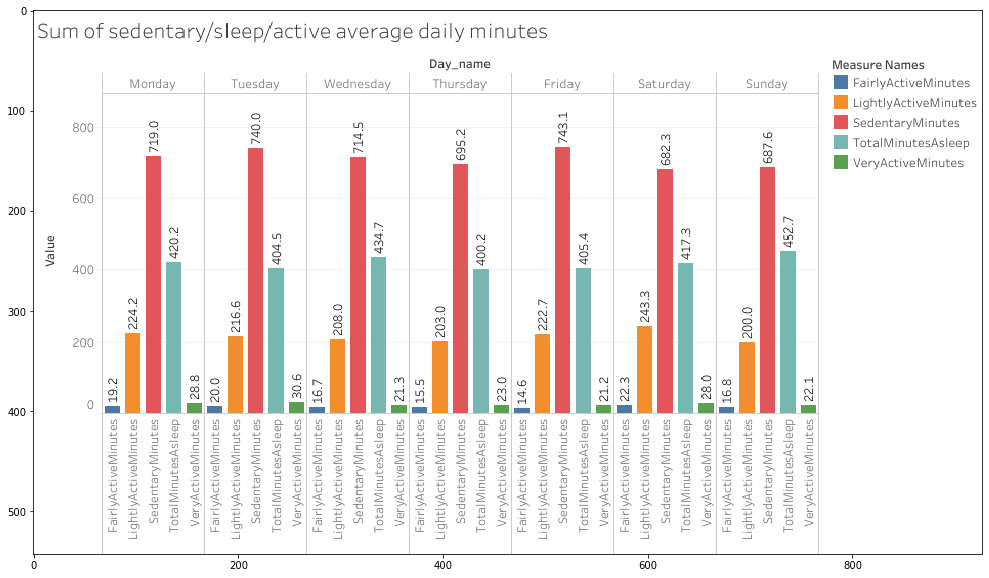

The longest sedentary time values can be observed in Friday and Tuesday
A little shorter sedentary time in Saturday and Sunday
Minutes asleep have the maximum level in Wednesday, followed by Sunday
Lightly active minutes have the maximum level in Saturday


In [9]:
# time_per_day_processed in Tableau
img = plt.imread(r'C:\Users\User\Documents\Google data analytics\Capstone Project\Case study 2\DataSET\Fitabase Data 4.12.16-5.12.16\For_Tableau\time_per_day_3.png')
plt.figure(figsize = (17,10))
plt.imshow(img, interpolation='nearest', aspect='auto')
plt.show()
print('The longest sedentary time values can be observed in Friday and Tuesday')
print('A little shorter sedentary time in Saturday and Sunday')
print('Minutes asleep have the maximum level in Wednesday, followed by Sunday')
print('Lightly active minutes have the maximum level in Saturday')

In [10]:
total_time = time_per_day['VeryActiveMinutes'].sum() + time_per_day['FairlyActiveMinutes'].sum() + time_per_day['LightlyActiveMinutes'].sum() + time_per_day['SedentaryMinutes'].sum() + time_per_day['TotalMinutesAsleep'].sum()

In [11]:
# Average hours per day
Sedentary_time = time_per_day['SedentaryMinutes'].sum()/60/7 #sum of average time divided by 60 to receive hours and by 7 as time_per_day table grouped by week days 
Time_in_bed = time_per_day['TotalMinutesAsleep'].sum()/60/7
Lightly_Active = time_per_day['LightlyActiveMinutes'].sum()/60/7
Very_Active = time_per_day['VeryActiveMinutes'].sum()/60/7
Fairly_Active = time_per_day['FairlyActiveMinutes'].sum()/60/7

print('Sedentary_time ', round(Sedentary_time,2),'hours')
print('Sleep_time     ', round(Time_in_bed,2),'hours')
print('Lightly_Active ', round(Lightly_Active,2),'hours')
print('Very_Active    ', round(Very_Active,2),'hours')
print('Fairly_Active  ', round(Fairly_Active,2),'hours')

print('which is 23.18 hours in total. The rest 42 minutes is probably average time occupied by time in bed not sleeping')

Sedentary_time  11.86 hours
Sleep_time      6.99 hours
Lightly_Active  3.61 hours
Very_Active     0.42 hours
Fairly_Active   0.3 hours
which is 23.18 hours in total. The rest 42 minutes is probably average time occupied by time in bed not sleeping


### 2. What time the majority of users wakeup/go sleep

In [12]:
Minutes.head()

,Unnamed: 0,Id,ActivityMinute,Calories,Intensity,METs,Steps,Sleep_time,Day_name,Month_name,Hour
0,0,1503960366,2016-04-12 00:00:00,0.7865,0,10,0,0.0,Tuesday,April,24
1,1,1503960366,2016-04-12 00:01:00,0.7865,0,10,0,0.0,Tuesday,April,24
2,2,1503960366,2016-04-12 00:02:00,0.7865,0,10,0,0.0,Tuesday,April,24
3,3,1503960366,2016-04-12 00:03:00,0.7865,0,10,0,0.0,Tuesday,April,24
4,4,1503960366,2016-04-12 00:04:00,0.7865,0,10,0,0.0,Tuesday,April,24


In [13]:
# Minutes dataframe grouped by Hour column
groupby_hour = Minutes.groupby('Hour')[['Sleep_time', 'Calories', 'Intensity', 'METs', 'Steps']].sum()
groupby_hour.reset_index(inplace= True )
groupby_hour.head()

,Hour,Sleep_time,Calories,Intensity,METs,Steps
0,1,13489.0,65481.774387,1324,591161,21555
1,2,15379.0,64573.540389,974,582416,15964
2,3,15989.0,63031.820571,414,569284,5996
3,4,15606.0,63640.145202,590,573112,11836
4,5,14413.0,76165.907589,4614,663903,40886


In [14]:
# saving groupby_hour csv file
groupby_hour.to_csv(r'C:\Users\User\Documents\Google data analytics\Capstone Project\Case study 2\DataSET\Fitabase Data 4.12.16-5.12.16\For_Tableau\groupby_hour.csv')

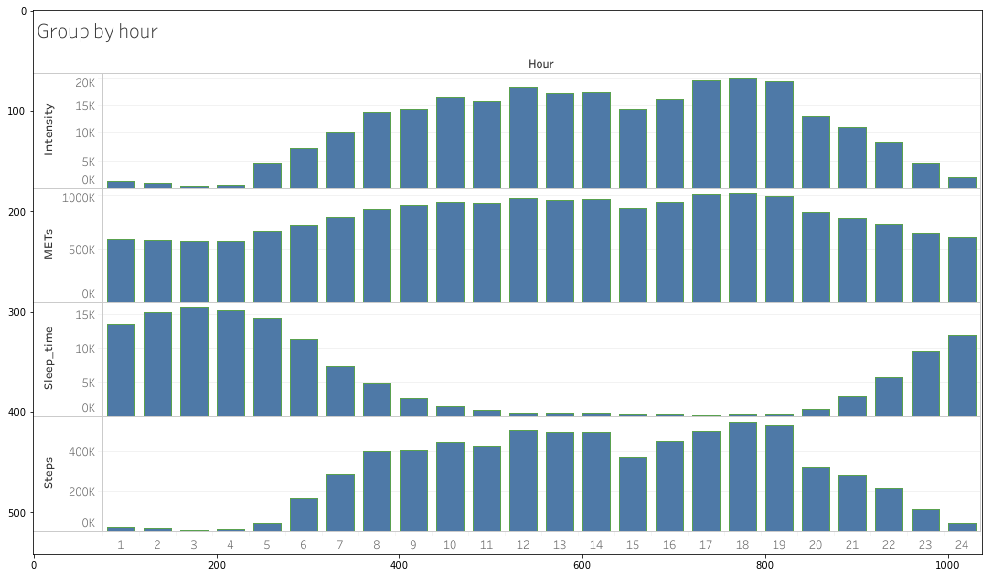

Not surprisingly most smart device users sleep from 9 pm to 8 am
Intensity Minutes are earned based on current heart rate when compared to average resting heart rate or the number of steps taken per minute, that is why it repeats steps dynamics.


In [15]:
# minutes grouped by hour in Tableau
img = plt.imread(r'C:\Users\User\Documents\Google data analytics\Capstone Project\Case study 2\DataSET\Fitabase Data 4.12.16-5.12.16\For_Tableau\groupby_hour.png')
plt.figure(figsize = (17,10))
plt.imshow(img, interpolation='nearest', aspect='auto')
plt.show()
print('Not surprisingly most smart device users sleep from 9 pm to 8 am')
print('Intensity Minutes are earned based on current heart rate when compared to average resting heart rate or the number of steps taken per minute, that is why it repeats steps dynamics.')

### 3. What is the average amount of steps users do per day

In [16]:
Days.head()

,Unnamed: 0,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,...,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day_name,Month_name
0,0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,...,25,13,328,728,1985,1.0,327.0,346.0,Tuesday,April
1,1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,...,21,19,217,776,1797,2.0,384.0,407.0,Wednesday,April
2,2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,...,30,11,181,1218,1776,NaN,0.0,NaN,Thursday,April
3,3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,...,29,34,209,726,1745,1.0,412.0,442.0,Friday,April
4,4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,...,36,10,221,773,1863,2.0,340.0,367.0,Saturday,April


In [17]:
# 'Days' dataframe grouped by ActivityDate
steps_df = Days.groupby('ActivityDate')[['TotalSteps', 'Calories']].sum()
steps_df.reset_index(inplace = True)
steps_df.head()

,ActivityDate,TotalSteps,Calories
0,2016-04-12,271816,78893
1,2016-04-13,237558,75459
2,2016-04-14,255538,77761
3,2016-04-15,248617,77721
4,2016-04-16,277733,76574


In [18]:
# daily average amount of steps per person = total steps divided by number of days and divided by number of individuals
avg_steps = round(steps_df['TotalSteps'].sum()/Days['Id'].nunique()/steps_df['ActivityDate'].nunique())
print('Average amount of daily steps per person is ', avg_steps)

Average amount of daily steps per person is  7018


#### So, average number of steps per day is 7018. However, it is likely that some people are more active and take more steps, and some less than the average. It can  be useful to know how smart device users can be segmented by the number of steps

In [19]:
# 'Days' dataframe grouped by ID
steps_df1 = Days.groupby(['Id'])['TotalSteps'].agg(['sum']).sort_values(by='sum', ascending=False)
steps_df1.reset_index(inplace = True)
steps_df1.head()

,Id,sum
0,8877689391,497241
1,8053475328,457662
2,1503960366,375619
3,2022484408,352490
4,4388161847,335232


In [20]:
# Visualization of steps information 
data = go.Box(y=steps_df1['sum'], name = 'Box plot')
layout = go.Layout(title='Total steps Boxplot', yaxis=dict(title='Steps quantity'))
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

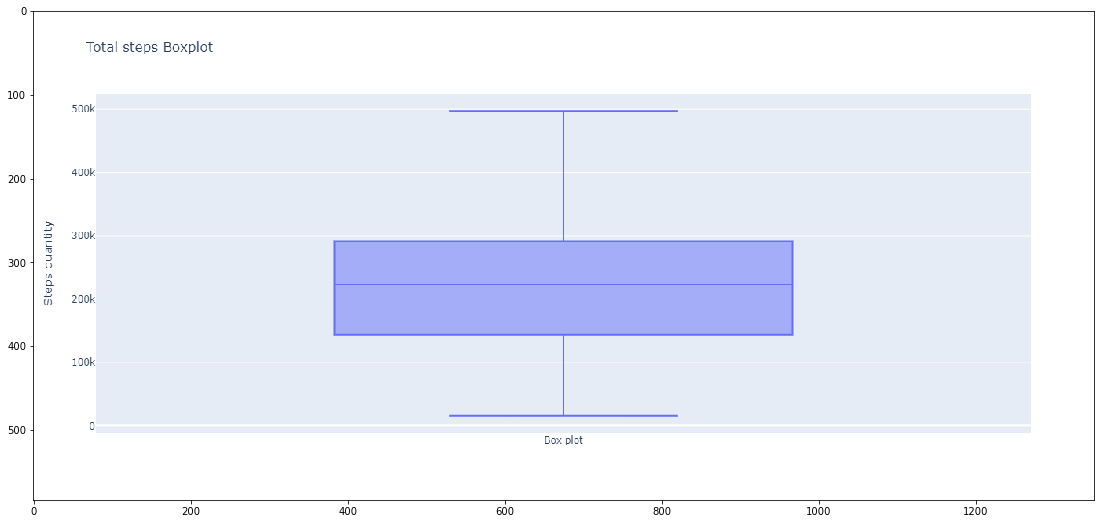

In [21]:
#downladed picture from previous step
from matplotlib import pyplot as pylt
img = pylt.imread(r"C:\Users\User\Documents\Google data analytics\Capstone Project\Case study 2\VIZ\Total steps Boxplot.png")
pylt.figure(figsize = (19,9))
pylt.imshow(img, interpolation='nearest', aspect='auto')
pylt.show()

#### By determining quartiles, all users can be segmented according to level of their activity
    > The first quartile is when a peson do up to 144K steps in 31 days, (~4.6K per day), can be called passive segment 
    > The second quartile - from 144K to 223K (~ 4.6K - 7.2K per day), can be called upper-passive segment 
    > The third quartile  - from 223K to 291K (~ 7.2K - 9.4K per day), can be called semi-active segment 
    > The fourth quartile - from 291K to 497K (~ 9.4K - 16K per day), can be called active segment   

In [22]:
# how many people can be reffered to passive segment, upper-passive segment, semi-active segment  and active segment

less_144K = steps_df1['sum'] <= 144976 #filter 'steps_df1' dataframe to reflect only rows with steps less or equal than 144976

more_144K = steps_df1['sum'] > 144976
less_223K = steps_df1['sum'] <= 223154

more_223K = steps_df1['sum'] > 223154
less_291K = steps_df1['sum'] <= 291496

more_291K = steps_df1['sum'] > 291496 #filter 'steps_df1' dataframe to reflect only rows with steps more than 291496



passive_segment = steps_df1[less_144K]
upper_passive_segment = steps_df1[more_144K & less_223K]
semi_active_segment = steps_df1[more_223K & less_291K]
active_segment = steps_df1[more_291K]

print('number of people in passive_segment is ', passive_segment['Id'].nunique())
print('number of people in passive_segment is ', upper_passive_segment['Id'].nunique()) 
print('number of people in passive_segment is ', semi_active_segment['Id'].nunique()) 
print('number of people in passive_segment is ', active_segment['Id'].nunique()) 

number of people in passive_segment is  8
number of people in passive_segment is  9
number of people in passive_segment is  8
number of people in passive_segment is  8


### 4. Is there any day per week with maximum/minimum activity

In [24]:
# group by Day_name
Day_name_steps_df = Minutes.groupby(['Day_name'])['Steps'].agg(['sum']).sort_values(by='sum', ascending=False)
Day_name_steps_df.reset_index(inplace = True)
Day_name_steps_df.head(10)

,Day_name,sum
0,Tuesday,1204432
1,Wednesday,1117874
2,Thursday,1055176
3,Saturday,1003914
4,Friday,934681
5,Monday,922682
6,Sunday,834790


#### The most step based active day according to this dataset is Tuesday, the last is Sunday

### 5. Maximum/minimum sleep time per week

In [25]:
# group by Day_name
Day_name_steps_df = Minutes.groupby(['Day_name'])['Sleep_time'].agg(['sum']).sort_values(by='sum', ascending=False)
Day_name_steps_df.reset_index(inplace = True)
Day_name_steps_df.head(10)

,Day_name,sum
0,Sunday,23028.0
1,Wednesday,22797.0
2,Thursday,21481.0
3,Saturday,20008.0
4,Tuesday,19215.0
5,Monday,15746.0
6,Friday,15064.0


#### Sunday shows maximum sleep time, Friday - minimum

### 6. Maximum steps, calories per hour

In [33]:
#Groupby Minutes dataframe by Hour column with aggregation of 'Steps'
Hour_steps = Minutes.groupby(['Hour'])['Steps'].agg(['sum']).sort_values(by='sum', ascending=False)
Hour_steps.reset_index(inplace = True)
Hour_steps.head()

,Hour,sum
0,18,542848
1,19,528552
2,12,505848
3,17,498511
4,14,497158


In [34]:
#Groupby Minutes dataframe by Hour column with aggregation of 'Calories'
Hour__calories = Minutes.groupby(['Hour'])['Calories'].agg(['sum']).sort_values(by='sum', ascending=False)
Hour__calories.reset_index(inplace = True)
Hour__calories.head(5)

,Hour,sum
0,18,111874.801325
1,17,111207.904204
2,19,110051.666754
3,12,108051.356172
4,14,106278.275241


In [30]:
# 6, 7 p.m - maximum steps hours
# 6, 5 p.m - maximum calories hours

### 7. Is there any correlation btw calories burnt and sleep time

In [35]:
Days.head()

,Unnamed: 0,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,...,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day_name,Month_name
0,0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,...,25,13,328,728,1985,1.0,327.0,346.0,Tuesday,April
1,1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,...,21,19,217,776,1797,2.0,384.0,407.0,Wednesday,April
2,2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,...,30,11,181,1218,1776,NaN,0.0,NaN,Thursday,April
3,3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,...,29,34,209,726,1745,1.0,412.0,442.0,Friday,April
4,4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,...,36,10,221,773,1863,2.0,340.0,367.0,Saturday,April


In [36]:
columns = ['Calories', 'TotalMinutesAsleep', 'TotalSteps', 'SedentaryMinutes', 'VeryActiveMinutes', 'LightlyActiveMinutes']
corr_df = Days[columns]

In [37]:
!pip install phik

In [38]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [39]:
phik_corr = corr_df.phik_matrix()
phik_corr.round(2)

interval columns not set, guessing: ['Calories', 'TotalMinutesAsleep', 'TotalSteps', 'SedentaryMinutes', 'VeryActiveMinutes', 'LightlyActiveMinutes']


,Calories,TotalMinutesAsleep,TotalSteps,SedentaryMinutes,VeryActiveMinutes,LightlyActiveMinutes
Calories,1.00,0.23,0.72,0.70,0.68,0.49
TotalMinutesAsleep,0.23,1.00,0.28,0.79,0.12,0.35
TotalSteps,0.72,0.28,1.00,0.66,0.68,0.71
SedentaryMinutes,0.70,0.79,0.66,1.00,0.28,0.78
VeryActiveMinutes,0.68,0.12,0.68,0.28,1.00,0.23
LightlyActiveMinutes,0.49,0.35,0.71,0.78,0.23,1.00


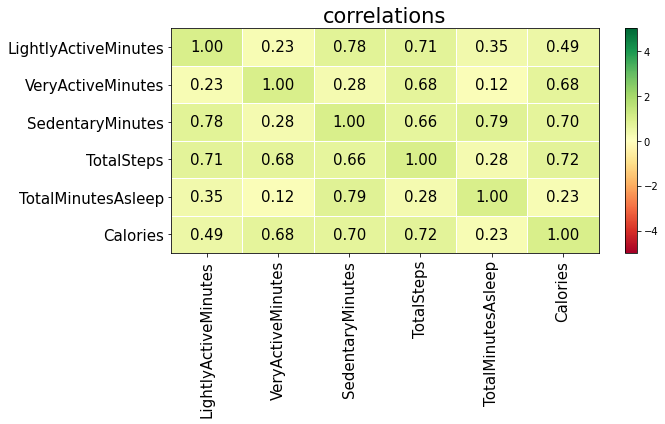

In [40]:
plot_correlation_matrix(phik_corr.fillna(0).values,
                       x_labels=phik_corr.columns,
                       y_labels=phik_corr.index,
                       vmin=-5, vmax=5, title="correlations",
                       usetex=False, fontsize_factor=1.5, figsize=(10, 6))
plt.tight_layout()

##### total minutes asleep  do not influence calories much.  

### 8. What is the main difference btw people who burn relatively larger calories amount in comparison with those who burn less.

In [41]:
Days.head(2)

,Unnamed: 0,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,...,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day_name,Month_name
0,0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,...,25,13,328,728,1985,1.0,327.0,346.0,Tuesday,April
1,1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,...,21,19,217,776,1797,2.0,384.0,407.0,Wednesday,April


In [42]:
Days.columns

Index(['Unnamed: 0', 'Id', 'ActivityDate', 'TotalSteps', 'TotalDistance',
       'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed', 'Day_name',
       'Month_name'],
      dtype='object')

In [43]:
# group by Id

columns = ['Calories', 'SedentaryMinutes',
       'LightlyActiveMinutes', 'FairlyActiveMinutes',
       'VeryActiveMinutes', 'SedentaryActiveDistance',
       'LightActiveDistance', 'ModeratelyActiveDistance',
       'VeryActiveDistance', 'TotalSteps', 'TotalDistance',
        'TotalMinutesAsleep',]
burnt_calories_df = Days.groupby(['Id'])[columns].sum()
burnt_calories_df.reset_index(inplace = True)
burnt_calories_df.head()

,Id,Calories,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,TotalSteps,TotalDistance,TotalMinutesAsleep
0,1503960366,56309,26293,6818,594,1200,0.00,128.740000,24.62,88.61,375619,242.099999,9007.0
1,1624580081,45984,38990,4758,180,269,0.19,80.810000,11.18,29.12,178061,121.360001,0.0
2,1644430081,84339,34856,5354,641,287,0.12,108.270001,28.53,21.90,218489,158.860001,1176.0
3,1844505072,48778,37405,3579,40,4,0.00,51.069999,1.52,0.26,79982,52.890000,1956.0
4,1927972279,67357,40840,1196,24,41,0.00,15.720000,0.97,2.97,28400,19.670000,2085.0


In [44]:
burnt_calories_df = burnt_calories_df.sort_values("Calories", ascending=False)

In [45]:
top_5 = burnt_calories_df.head()
last_5 = burnt_calories_df.tail()

In [46]:
concat_top_last = pd.concat([top_5, last_5])
concat_top_last = concat_top_last.sort_values("Calories", ascending=False)
concat_top_last.head(10)

,Id,Calories,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,TotalSteps,TotalDistance,TotalMinutesAsleep
29,8378563200,106534,22200,4839,318,1819,0.00,120.569999,16.090000,77.610000,270249,214.320002,13411.0
32,8877689391,106028,34499,7276,308,2048,0.16,191.850000,10.470000,205.760000,497241,409.599997,0.0
20,5577150313,100789,22633,4438,895,2620,0.00,72.840000,19.740000,93.410000,249133,186.399999,11232.0
15,4388161847,95910,25937,7110,631,718,0.00,167.280000,27.960000,53.300000,335232,260.190003,8733.0
18,4702921684,91932,23759,7362,807,159,0.00,161.990002,40.450000,12.940000,265734,215.610000,10752.0
11,3977333714,45410,21226,5243,1838,567,0.00,94.030000,82.529999,48.449999,329537,225.509998,8222.0
10,3372868164,38662,21551,6558,82,183,0.22,78.199999,3.060000,12.590000,137233,94.140001,0.0
8,2347167796,36782,12369,4545,370,243,0.00,75.990001,19.350000,19.070000,171354,114.400000,6702.0
28,8253242879,33972,24460,2221,272,390,0.01,33.340000,13.220000,42.069999,123161,88.680001,0.0
13,4057192912,7895,4869,412,6,3,0.00,10.750000,0.260000,0.210000,15352,11.450000,0.0


In [47]:
# saving concat_top_last csv file
concat_top_last.to_csv(r'C:\Users\User\Documents\Google data analytics\Capstone Project\Case study 2\DataSET\Fitabase Data 4.12.16-5.12.16\For_Tableau\concat_top_last.csv')

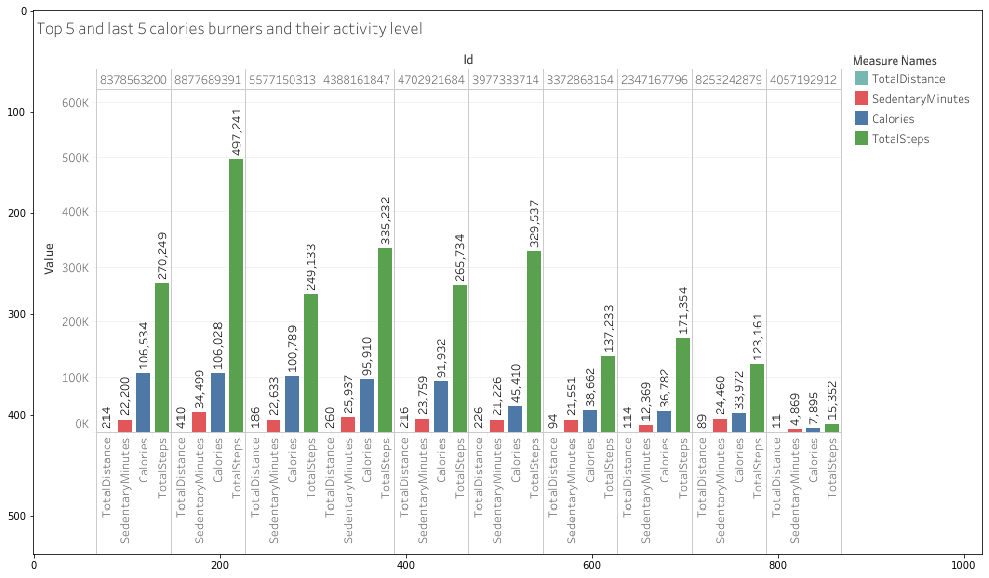

In general, it can be seen that the last 5 calorie burners have fewer steps than top 5.
However, there is one smart device user from the last 5 list (ID - 3977333714), whose number of steps exceeds the number of leader's steps in terms of calories burned (ID - 8378563200).


In [48]:
# Top 5 and last 5 calorie burners grouped by Id in Tableau
img = plt.imread(r'C:\Users\User\Documents\Google data analytics\Capstone Project\Case study 2\DataSET\Fitabase Data 4.12.16-5.12.16\For_Tableau\top5_and_last5.png')
plt.figure(figsize = (17,10))
plt.imshow(img, interpolation='nearest', aspect='auto')
plt.show()
print('In general, it can be seen that the last 5 calorie burners have fewer steps than top 5.')
print("However, there is one smart device user from the last 5 list (ID - 3977333714), whose number of steps exceeds the number of leader's steps in terms of calories burned (ID - 8378563200).")


Below is a graph comparing calories burned to other metrics without taking into account number of steps to determine another instance that affects calorie burn.


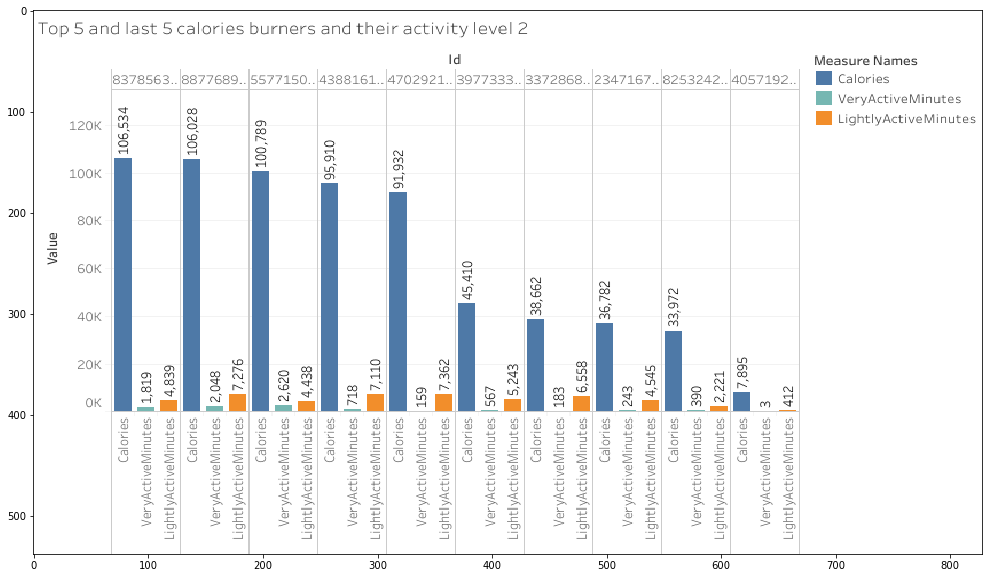

If we compare device user from the last 5 list (ID - 3977333714) and top calorie burner (ID - 8378563200) we can see that VeryActiveMinutes times are very different.
Thus, calorie expenditure is strongly influenced by the number of steps, and also by the number of very active minutes per day. The top calorie burner has about 7 hours a week of very active time.


In [49]:
print('Below is a graph comparing calories burned to other metrics without taking into account number of steps to determine another instance that affects calorie burn.')

# Top 5 and last 5 calorie burners grouped by Id in Tableau
img = plt.imread(r'C:\Users\User\Documents\Google data analytics\Capstone Project\Case study 2\DataSET\Fitabase Data 4.12.16-5.12.16\For_Tableau\top5_and_last5 - 2.png')
plt.figure(figsize = (17,10))
plt.imshow(img, interpolation='nearest', aspect='auto')
plt.show()
print('If we compare device user from the last 5 list (ID - 3977333714) and top calorie burner (ID - 8378563200) we can see that VeryActiveMinutes times are very different.')
print('Thus, calorie expenditure is strongly influenced by the number of steps, and also by the number of very active minutes per day. The top calorie burner has about 7 hours a week of very active time.')

## Conclusion

### Following questions may help find insights:
> 1. What parts of users' day are occupied by bed time, sedentary or active time? <br/>
answer:<br/>
Sedentary_time  11.86 hours. <br/>
Sleep_time      6.99 hours. <br/>
Lightly_Active  3.61 hours. <br/>
Very_Active     0.42 hours. <br/>
Fairly_Active   0.3 hours. <br/>
which is 23.18 hours in total. The rest 42 minutes is probably average time occupied by time in bed not sleeping   
        
> 2. What time the majority of users wakeup/go sleep? <br/>
answer: <br/>
Not surprisingly most smart device users sleep from 9 pm to 8 am 

> 3. What is the average amount of steps users do per day? <br/>
answer: <br/>
7018 steps <br/>
By determining quartiles, all users can be segmented according to level of their activity
the first quartile is when a peson do up to 144K steps in 31 days, (~4.6K per day), can be called passive segment 
the second quartile - from 144K to 223K (~ 4.6K - 7.2K per day), can be called upper-passive segment 
the third quartile - from 223K to 291K (~ 7.2K - 9.4K per day), can be called semi-active segment 
the fourth quartile - from 291K to 497K (~ 9.4K - 16K per day), can be called active segment 


> 4. Is there any day per week with maximum/minimum activity? <br/> 
answer: <br/>
The most step based active day according to this dataset is Tuesday, the least is Sunday

> 5. Is there any day per week with maximum/minimum sleep time?<br/>
answer: <br/>
Sunday shows maximum sleep time, Friday - minimum <br/>

> 6. Maximum steps, calories per hour <br/>
6, 7 p.m - maximum steps hours
6, 5 p.m - maximum calories hours
                                                     
> 7. Is there any correlation btw calories burnt and sleep time? <br/>
answer: <br/>
Total minutes asleep do not influence calories much

> 8. What is the main difference btw people who burn relatively larger calories amount in comparison with those who burn less? <br/>
answer: <br/>
Calorie expenditure is strongly influenced by the number of steps, and also by the number of very active minutes per day. <br/> The top calorie burner has about 7 hours a week of very active time.